In [220]:
# Aim is to find the 10 most frequent character names written in the first Harry Potter book
# Then plot the top character occurrences throughout the book on a line graph

from matplotlib import pyplot as plt
import re

plt.style.use('default')

In [221]:
# Defining some functions 

def find_capitalised(list_of_words):
    '''
    A function that finds all words in a given list that (1) the first letter of the word is
    capitalised, (2) assume that main character names are longer than 2 letters, (3) the word is not already in the new
    cap_words list.
    :param list_of_words: the list that we want to use to find all its capitalised words
    :return: return a new list containing distinct capitalised words from the original list
    '''
    cap_words = []

    for word in list_of_words:
        if word == word.capitalize() \
                and len(word) > 2 \
                and word not in cap_words:
                cap_words.append(word)

    return cap_words


def name_and_count_dict(list_of_caps, text):
    '''
    A function that takes in a list of capitalised words and adds each word from the list as a key to a new dictionary.
    The value of each key is the total count of the key in the given text.
    :param list_of_caps: a list of words where the first letter is capitalised (e.g. ['Harry', 'Ron'])
    :param text: the variable in which you want to count all occurrences of the capitalised words
    :return: a dictionary of capitalised words (i.e. potential character names) and their total count in the entire text
    '''
    names = {}

    for word in list_of_caps:
        names[word] = text.count(word)

    return names


def top_ten_words(unordered_dict):
    '''
    A function that takes in a dictionary, sorts it by its values into descending order, and adds the first 10 keys to
    a new dictionary, each of which has an empty list as the value.
    :param unordered_dict: a dictionary of words (key) and their count (value).
    :return: a dictionary of the top 10 words and empty lists as the value (e.g. {'Harry': [], 'Ron': []})
    '''
    top_names = {}

    ordered_names = (sorted(unordered_dict.items(), key=lambda x: x[1], reverse=True))

    for name in ordered_names[:10]:
        top_names[name[0]] = []

    return top_names

In [222]:
# Read into the Harry Potter text file 
with open('HP_Book1.txt', 'r') as file:

    content = file.read()

In [223]:
# regex to replace punctuation with spaces
content = re.sub('[^A-Za-z0-9]+', ' ', content)

# print(content)

# split the entire text into a list of the words
content_words = content.split()

In [224]:
# find all capitalised words (potential character names) in the book and add to a list
cap_words = find_capitalised(content_words)

# print(cap_words)

In [225]:
# add all the words from cap_words to a dictionary with the total count of each word in the book as the value
names_dict = name_and_count_dict(cap_words, content_words)

# print(names_dict)

In [226]:
# some frequent words from names_dict that are not names
remove_lst = ['The', 'Her', 'You', 'They', 'Professor', 'Dud', 'What']

# remove the frequent words that are not names from names_dict
for key in remove_lst:
    del names_dict[key]

print('Top 10 Occurring Character names:\n', sorted(names_dict.items(), key=lambda x: x[1], reverse=True)[:10])

Top 10 Occurring Character names:
 [('Harry', 1326), ('Ron', 429), ('Hagrid', 370), ('Hermione', 270), ('Snape', 172), ('Dumbledore', 157), ('Dudley', 138), ('Malfoy', 123), ('Neville', 117), ('Vernon', 116)]


In [227]:
# add the ten highest occurring character names in the book to a new dictionary
# empty list as each key's value as this will be used to store all the results of the name counts using a sliding window
# across the book
top_names = top_ten_words(names_dict)

print(top_names)

{'Harry': [], 'Ron': [], 'Hagrid': [], 'Hermione': [], 'Snape': [], 'Dumbledore': [], 'Dudley': [], 'Malfoy': [], 'Neville': [], 'Vernon': []}


In [228]:
# variables for the sliding window:
window_len = 10000 # number of words in each window
window_step = 200 # number words in each step
word_count = [] # empty list to store the total word count at each window

# iterate a sliding window over the content, populating top names with number of occurrences
for window_index in range(0, len(content_words)-window_len, window_step):
    content_windows = content_words[window_index:window_index+window_len]
    for person in top_names:
        top_names[person].append(content_windows.count(person))

# store the word count for each sliding window
for window_index in range(0, len(content_words)-window_len, window_step):
     word_count.append(window_index)

print(len(content_words))
print(len(word_count))
print(len(top_names['Harry']))

80648
354
354


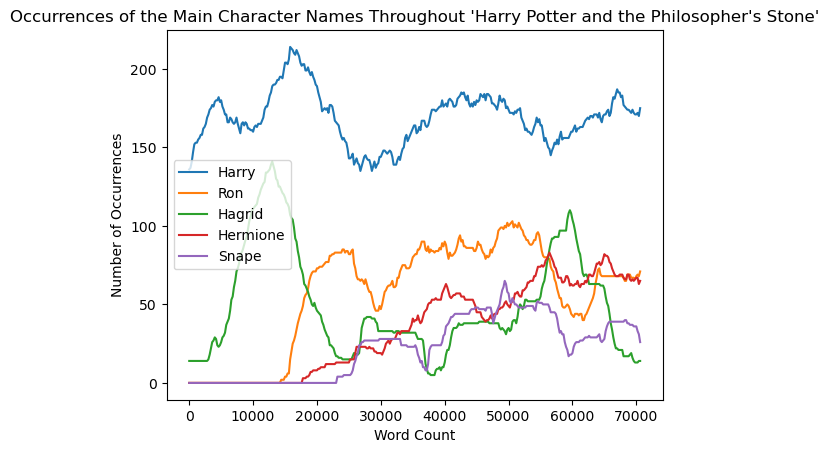

In [229]:
# Plot the occurrence of top characters names throughout the book
plt.plot(word_count, top_names['Harry'], label='Harry')
plt.plot(word_count, top_names['Ron'],  label='Ron')
plt.plot(word_count, top_names['Hagrid'],  label='Hagrid')
plt.plot(word_count, top_names['Hermione'], label='Hermione')
plt.plot(word_count, top_names['Snape'], label='Snape')
#plt.plot(top_names['Dumbledore'], label='Dumbledore')
#plt.plot(top_names['Dudley'], label='Dudley')
#plt.plot(top_names['Malfoy'], label='Malfoy')
#plt.plot(top_names['Neville'], label='Neville')
#plt.plot(top_names['Vernon'], label='Vernon')

plt.title("Occurrences of the Main Character Names Throughout 'Harry Potter and the Philosopher's Stone'")
plt.xlabel("Word Count")
plt.ylabel("Number of Occurrences")

plt.legend()
plt.rcParams['figure.figsize'] = [9, 6]
# plt.show()